# HUMAN RESOURCES ANALYTICS

Why are the best and most experienced employees leaving prematurely?

FEATURE EXPLANATION:-
    
Last evaluation

Number of projects

Average monthly hours

Time spent at the company

Whether they have had a work accident

Whether they have had a promotion in the last 5 years

Department

Salary

Whether the employee has left


### *IMPORT LIBRARIES*

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

### *COLLECT DATA*

In [43]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### *DATA EXPLORATION*

SHAPE OF DATA

In [3]:
df.shape

(14999, 10)

There are 14,999 rows of data with 10 features each.

DATA TYPES

In [4]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

We have two categorical features ('sales' and 'salary') and the remaining are continuous features.

MISSING VALUES

In [5]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

The given data has no missing values.

GENERAL STATISTICS

In [6]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


NUMERICAL FEATURES

*satisfaction_level*

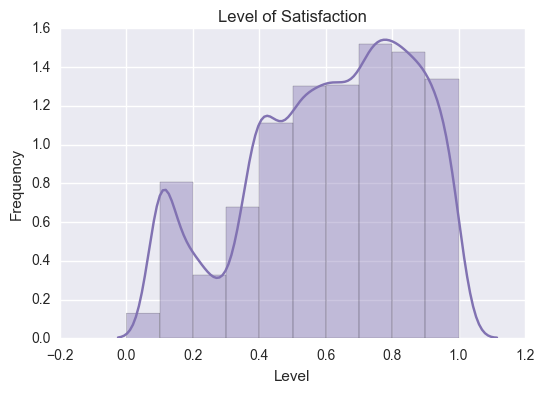

In [7]:
sns.distplot(df['satisfaction_level'], bins=[i/10 for i in range(11)], color=color[3])
plt.title('Level of Satisfaction')
plt.xlabel('Level')
plt.ylabel('Frequency')
plt.show()

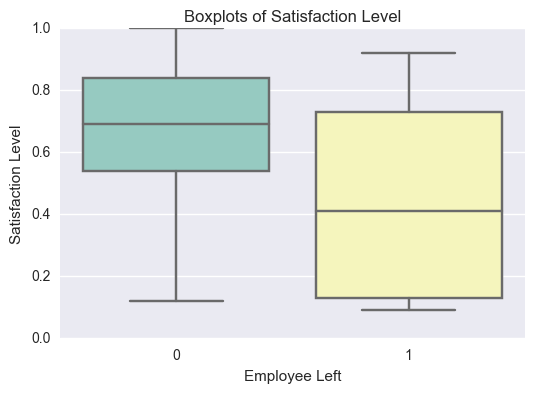

In [8]:
sns.boxplot(y='satisfaction_level', x='left', data=df, palette='Set3')
plt.title('Boxplots of Satisfaction Level')
plt.xlabel('Employee Left')
plt.ylabel('Satisfaction Level')
plt.show()

Satisfaction leves of emplyee who tend to leave is lesser than of those employees who tend to stay.

*last_evaluation*

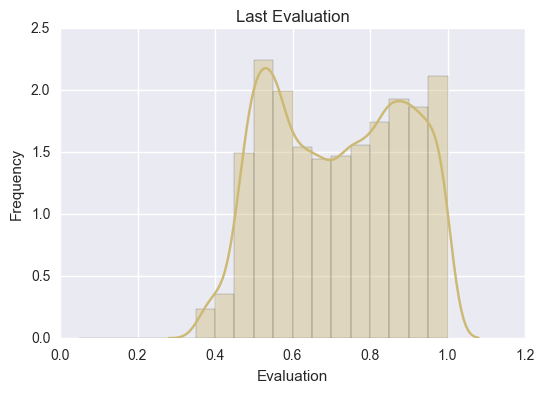

In [9]:
sns.distplot(df['last_evaluation'], bins=[i/20 for i in range(21)], color=color[4])
plt.title('Last Evaluation')
plt.ylabel('Frequency')
plt.xlabel('Evaluation')
plt.show()

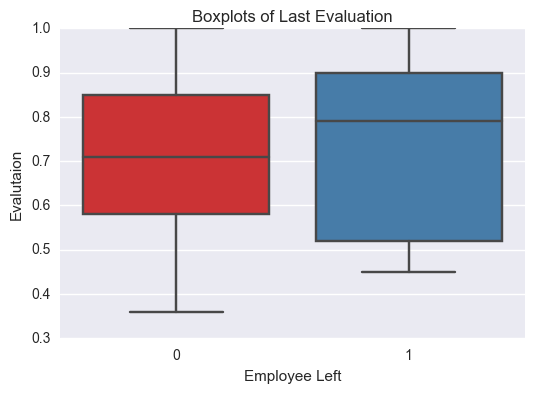

In [10]:
sns.boxplot(y='last_evaluation', x='left', data=df, palette='Set1')
plt.title('Boxplots of Last Evaluation')
plt.xlabel('Employee Left')
plt.ylabel('Evalutaion')
plt.show()

*number_projects*

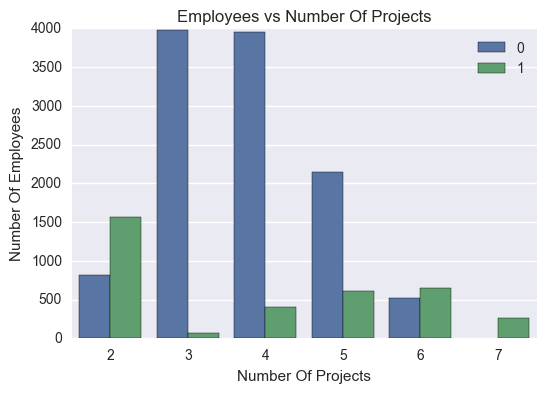

In [11]:
sns.countplot('number_project', hue='left', data=df)
plt.legend(loc='upper right')
plt.xlabel('Number Of Projects')
plt.ylabel('Number Of Employees')
plt.title('Employees vs Number Of Projects')
plt.show()

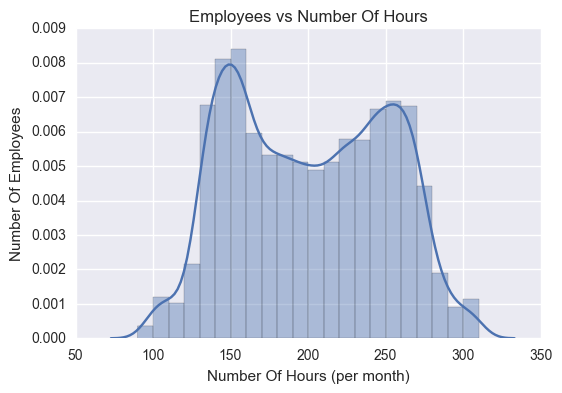

In [12]:
sns.distplot(df['average_montly_hours'], bins=[10*i + 90 for i in range(23)])
#plt.legend(loc='upper right')
plt.xlabel('Number Of Hours (per month)')
plt.ylabel('Number Of Employees')
plt.title('Employees vs Number Of Hours')
plt.show()

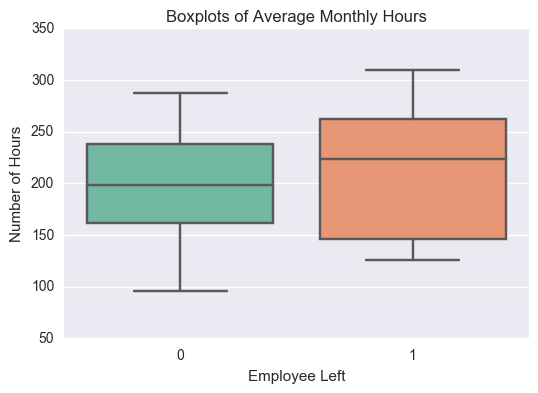

In [13]:
sns.boxplot(x='left', y='average_montly_hours', palette='Set2', data=df)
plt.title('Boxplots of Average Monthly Hours')
plt.xlabel('Employee Left')
plt.ylabel('Number of Hours')
plt.show()

The majority of employees, independent of them leaving the company, work almost the same amount hours on average.

*time_spend_company*

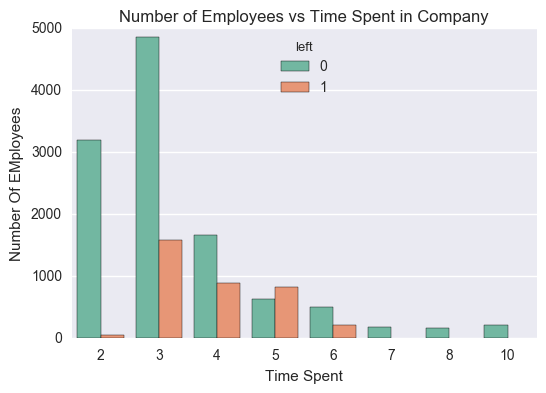

In [14]:
sns.countplot('time_spend_company', hue='left', data=df, palette='Set2')
plt.xlabel('Time Spent')
plt.ylabel('Number Of EMployees')
plt.title('Number of Employees vs Time Spent in Company')
plt.show()

The employees who leave the company have not spend much time in the company.

*work_accident*

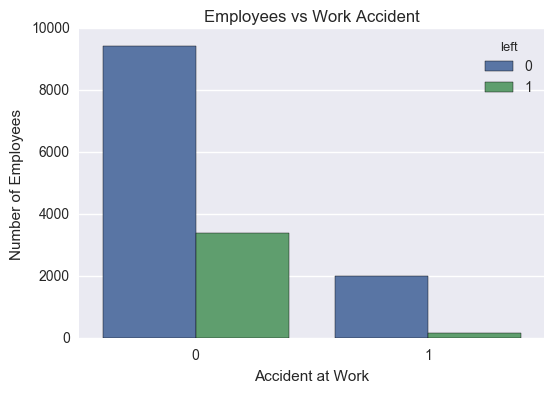

In [15]:
sns.countplot('Work_accident', hue='left', data=df)
plt.title('Employees vs Work Accident')
plt.xlabel('Accident at Work')
plt.ylabel('Number of Employees')
plt.show()

??

*promotion_last_5years*

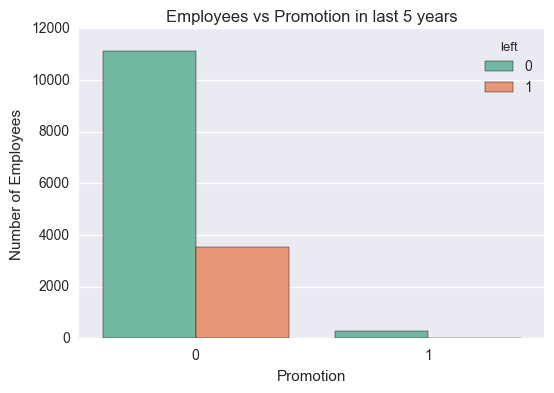

In [16]:
sns.countplot('promotion_last_5years', hue='left', data=df, palette='Set2')
plt.title('Employees vs Promotion in last 5 years')
plt.xlabel('Promotion')
plt.ylabel('Number of Employees')
plt.show()

CATEGORICAL FEATURES

*sales*

Number of employees per category.

In [17]:
df.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

Lets see how many employees from each department leave theh company.

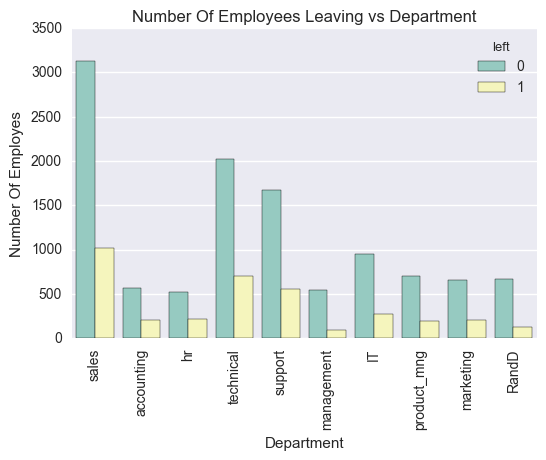

In [18]:
sns.countplot('sales', data=df, hue='left', palette='Set3')
plt.xticks(rotation = 'vertical')
plt.title('Number Of Employees Leaving vs Department')
plt.xlabel('Department')
plt.ylabel('Number Of Employes')
plt.show()

In [19]:
G = df[df['left']==1].groupby('sales')['left'].count()/df.groupby('sales')['left'].count() * 100
s = pd.Series(data=[str(G.mean())+' + '+str(G.mean()-G.values[i]) for i in range(len(G.values))], index=G.index)
s

sales
IT              22.838688013505 + 0.589299260449
RandD            22.838688013505 + 7.46384684451
accounting      22.838688013505 + -3.75844366837
hr              22.838688013505 + -6.25468140463
management       22.838688013505 + 8.39424356906
marketing      22.838688013505 + -0.820985646169
product_mng      22.838688013505 + 0.88746850131
sales           22.838688013505 + -1.65406560968
support         22.838688013505 + -2.06036985998
technical       22.838688013505 + -2.78631198649
dtype: object

**Almost the same percentage of employees have left from every department.**

*salary*

Number of employee per category.

In [20]:
df.salary.value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

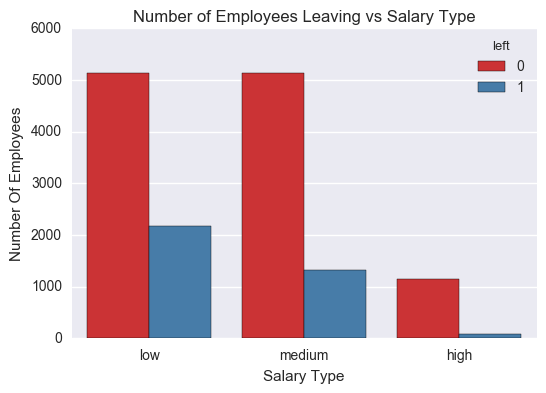

In [21]:
sns.countplot('salary', data=df, hue='left', palette='Set1')
plt.xlabel('Salary Type')
plt.ylabel('Number Of Employees')
plt.title('Number of Employees Leaving vs Salary Type')
plt.show()

**As expected. More the salary, less is the chance of an employee leaving.**

### *QUESTIONS*

*How are the evaluation and satisfaction levels of the employee related to the resignation of the employee?*

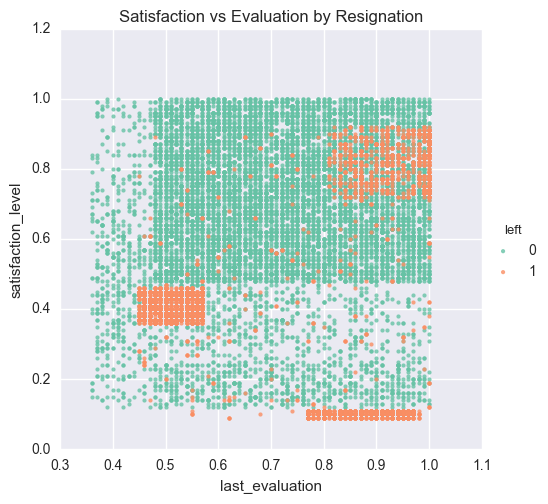

In [68]:
sns.lmplot(x='last_evaluation', y='satisfaction_level', data=df, hue='left',
           fit_reg=False, scatter_kws={'s':9}, palette='Set2')

plt.title('Satisfaction vs Evaluation by Resignation')
plt.show()

We can see three distinct rectangles which are the regions of values where the employee has left the company.

*Do employees, who have spent more time in the company, get a promotion or a higher salary?*

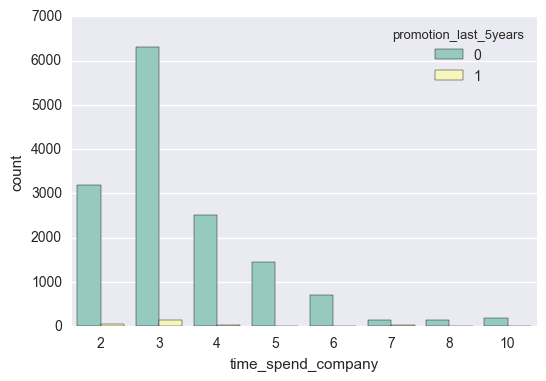

In [45]:
sns.countplot('time_spend_company', data=df, hue='promotion_last_5years', palette='Set3')
plt.show()

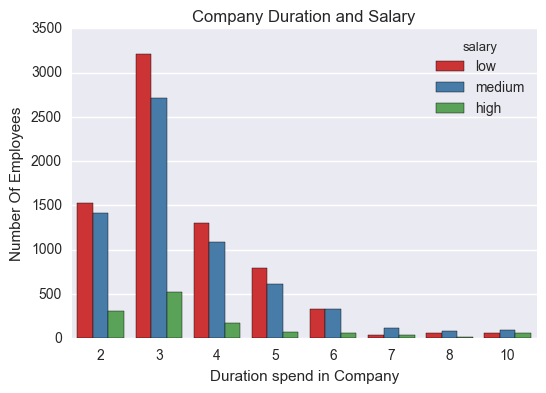

In [48]:
sns.countplot('time_spend_company', data=df, hue='salary', palette='Set1')
plt.xlabel('Duration spend in Company')
plt.ylabel('Number Of Employees')
plt.title('Company Duration and Salary')
plt.show()

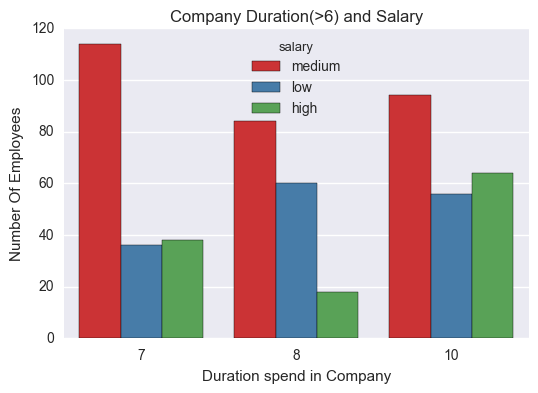

In [53]:
sns.countplot('time_spend_company', data=df[df['time_spend_company'] > 6], hue='salary', palette='Set1')
plt.xlabel('Duration spend in Company')
plt.ylabel('Number Of Employees')
plt.title('Company Duration(>6) and Salary')
plt.show()

There are lots of employees who feel (and maybe are) underpaid even after spending a lot of time with the company.

*Now, how many of them leave the company?*

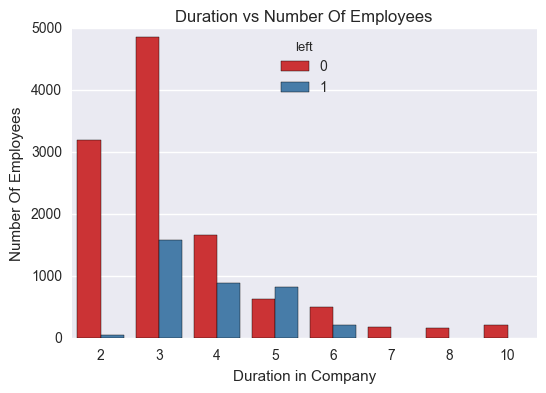

In [58]:
sns.countplot('time_spend_company', data=df, hue='left', palette='Set1')
plt.xlabel('Duration in Company')
plt.ylabel('Number Of Employees')
plt.title('Duration vs Number Of Employees')
plt.show()

**As you can see, the majority of the employees leaving the company have spent a maximum of six years with the company and employees sepnding more than six year with the company do not leave :D**

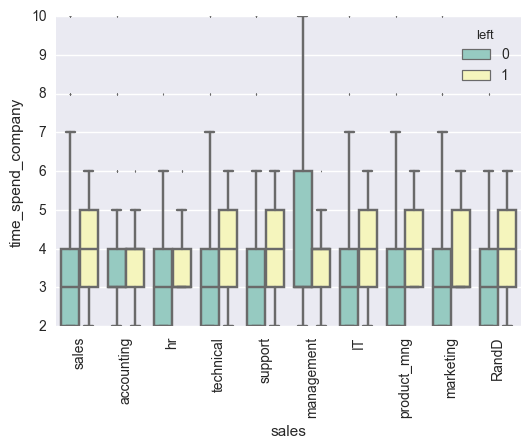

In [100]:
sns.boxplot(x='sales', y='time_spend_company', data=df, hue='left', palette='Set3',fliersize=1)
plt.xticks(rotation='vertical')
plt.show()

**Except for the management. accounting, and hr departments, employees who leave have spent more time with the company than the ones who stay.**

**All the employees who have spend more than 7 years in the company are in the management department.**

*Does promotion change their mind to not leave the company?*

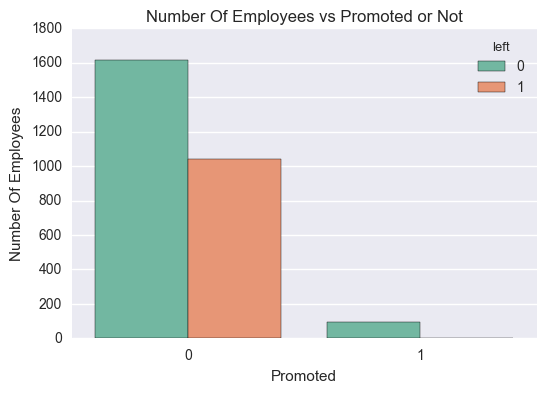

In [63]:
sns.countplot('promotion_last_5years', data=df[df['time_spend_company']>4], hue='left', palette='Set2')
plt.xlabel('Promoted')
plt.ylabel('Number Of Employees')
plt.title('Number Of Employees vs Promoted or Not')
plt.show()

**Employees have still left even if they have been promoted :( and even though employees have not been promoted a large number of the employees stay with the company.**

*Do the employees work for longer hours and are underpaid? :O*

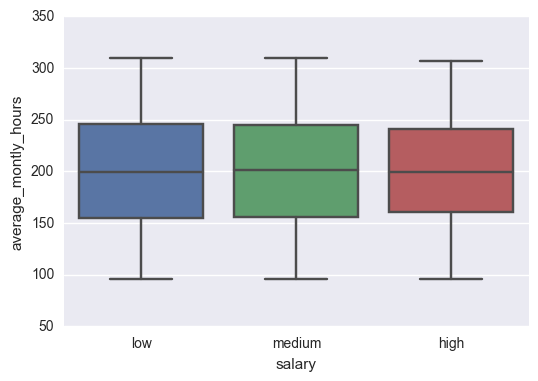

In [74]:
sns.boxplot(y='average_montly_hours', x='salary', data=df)
plt.show()

**It seems that the employees belonging to all the three categories work the same hours. This should be due to the fixed timings of the company.**

*Do the employees who have stayed for a longer time with the company work for longer hours?*

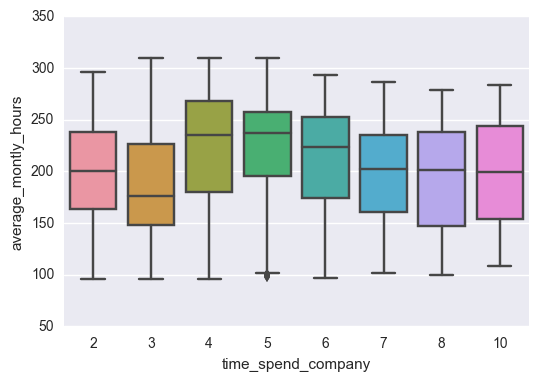

In [77]:
sns.boxplot(x='time_spend_company', y='average_montly_hours', data=df)
plt.show()

This is interesting. The employees who have spent around 4 years with the company have a higher number of work hours monthly and these also the employees who tend to leave send around this mush time. \\\_O\_/

*Does a higher number of average monthly work hours cause he employee to leave?*

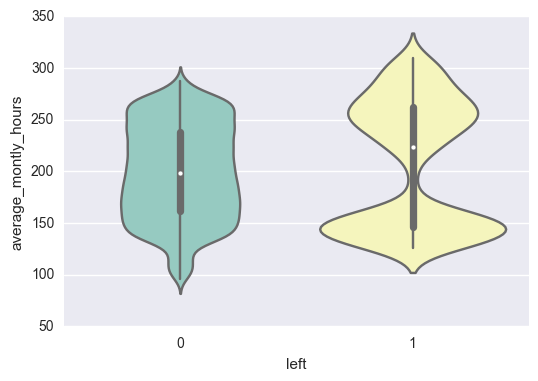

In [88]:
sns.violinplot(data=df, y='average_montly_hours', x='left', palette='Set3')

**So, looks like the employees don't want to work for longer hours.**

*What about the employees in a particular department?*

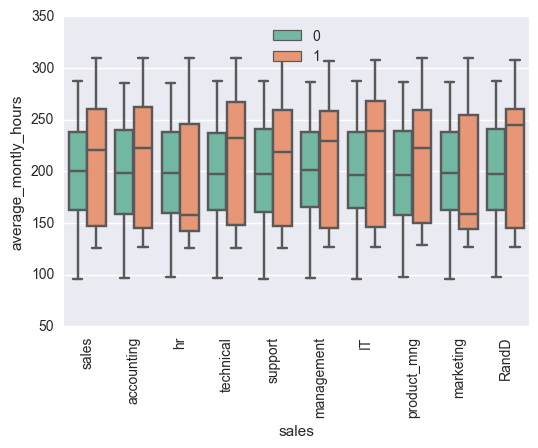

In [86]:
sns.boxplot(x='sales', y='average_montly_hours', data=df, hue='left', palette='Set2')
plt.xticks(rotation='vertical')
plt.legend(loc='upper center')
plt.show()

**The employees who leave the company work (on average) higher than those who dont leave the company**

### *FEATURE ENGINEERING*

I The columns names are not quite strange. First lets change the column names.

In [22]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [23]:
new_columns = ['satisfaction_level',
               'last_evaluation',
               'projects',
               'average_monthly_hours',
               'company_duration',
               'work_accident',
               'left',
               'promotion_5',
               'department',
               'salary_type']

df.columns = new_columns
df.head()

,satisfaction_level,last_evaluation,projects,average_monthly_hours,company_duration,work_accident,left,promotion_5,department,salary_type
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


II Now convert the two categorical values into numerical values.

In [24]:
le1 = LabelEncoder()
le2 = LabelEncoder()
df['department'] = le1.fit_transform(df['department'])
df['salary_type'] = le2.fit_transform(df['salary_type'])

print(df['department'].unique())
print(df['salary_type'].unique())

[7 2 3 9 8 4 0 6 5 1]
[1 2 0]


In [25]:
df.head()

,satisfaction_level,last_evaluation,projects,average_monthly_hours,company_duration,work_accident,left,promotion_5,department,salary_type
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


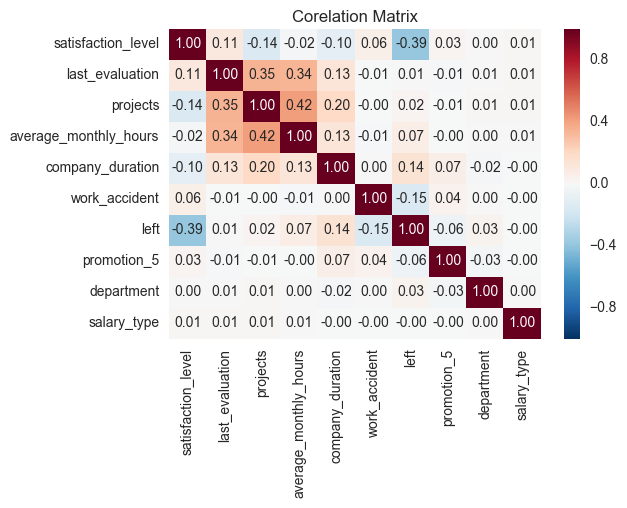

In [26]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Corelation Matrix')
plt.show()